<span style="font-size: 6px; float:right">Notebook created by Mateusz Guzik<a style="text-decoration: none; color:#000;"></a></span>
<br>
<center><font size="6"><b>Digital Signal Processing Lab</b></font></center>
<br />
<center><font size="5"><b><u>Filterbanks</u></b></font></center>

My name is Mariusz Więcławek.
If you have collaborated with other peers while working on this notebook, please annouce theirs names below.
- Adrian Przywara

# Introduction
A filterbank is a set of filters that decompose the input signals into multiple components, each one carrying a single frequency subband of the original signal. Filterbanks have found many different applications, including compression and spectrum analysis.

## Reading list

Before working with the notebook, you might find it useful to become acquainted with the following materials:
- <span style="font-size: 12px">Section **18.3.4. Warunek perfekcyjnej rekonstrukcji** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **18.5. Zespoły filtrów z modulacją kosinusową** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **18.5.1. Równania, budowa** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>
- <span style="font-size: 12px">Section **18.5.2. Projektowanie filtrów prototypowych** from “Cyfrowe przetwarzanie sygnałów : od teorii do zastosowań, WKŁ 2014” by T. P. Zieliński.</span>

## Notebook setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.io.wavfile import read
import IPython.display as ipd
from pathlib import Path
import requests
from tqdm import tqdm
from scipy.io import loadmat

In [2]:
def download(url, path):
    if not isinstance(path, Path):
        path = Path(path)
    if not path.is_file():
        r = requests.get(url)
        with open(path, "wb") as f:
            f.write(r.content)
            
urls = {
    "epic_sax_guy_single_channel.wav": "http://sp-class.agh.edu.pl/samples/epic_sax_guy_single_channel.wav",
}

for filename, url in tqdm(urls.items()):
    download(url, filename)

100%|██████████| 1/1 [00:00<00:00, 5468.45it/s]


# Cosine-modulated filterbank
The process of decomposition of the input signal performed by a filterbank is called <b>analysis</b>, whereas the reconstruction process is called <b>synthesis</b>. The general framework for analysis and synthesis is presented in the diagram below, where $x$ is the input signal, $H_k(z)$ is the transmitation of the $k$-th analysis filter, $y_k$ is the $k$-th subband component, $G_k(z)$ is the transmitation of the $k$-th synthesis filter, $y$ is the synthesized signal and $k=0,1,2...M-1$, where $M$ denotes the number of subbands. Since we limit the bandwith via the bandpass filter, we can additionaly downsample the signal. We do that to lower the ammount of the memory needed for storage and to speed up the computations. In the process of reconstruction the subband signals are upsampled and filtered with the synthesis filters. Finally, the resulting signals are summed up.

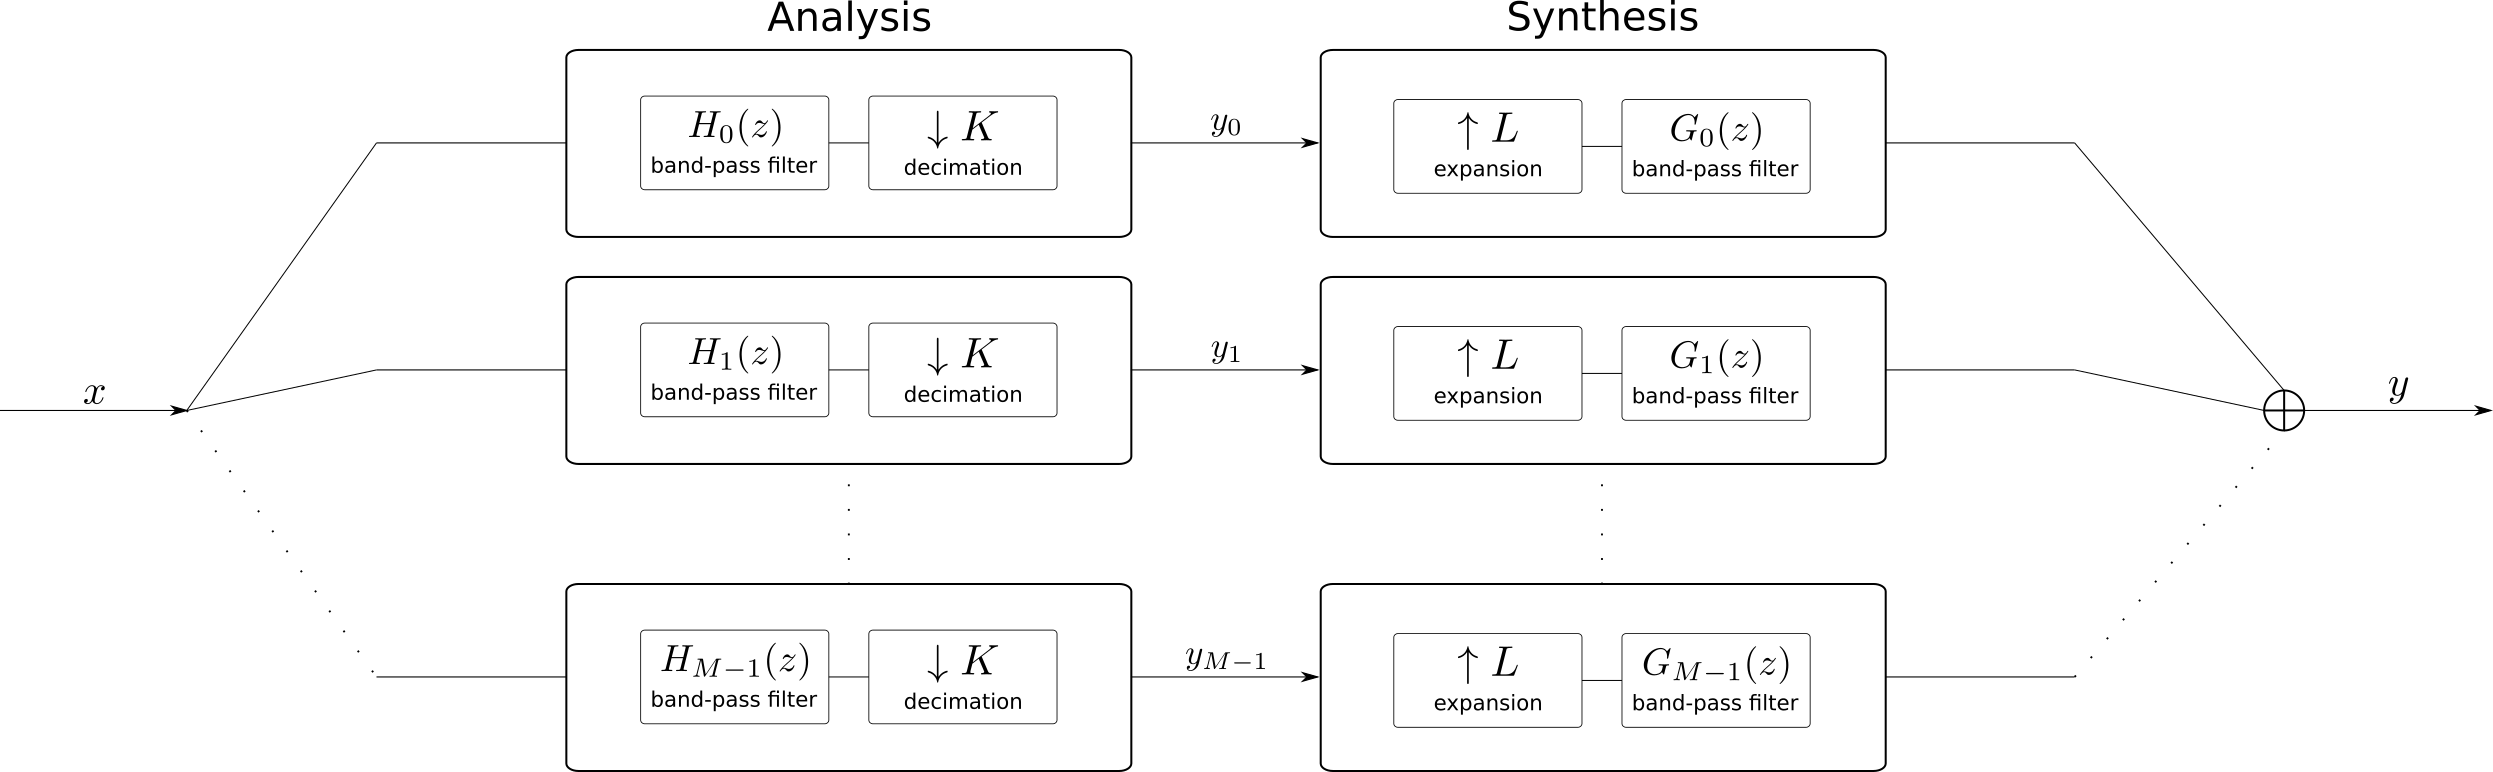

For the rest of this notebook we are going to consider the simplest setting when $M=K=L$, which is called critical sampling.

One way to obtain the filters it through the cosine modulation of a prototype lowpass filter, so that the analysis filters can be determined according to the formula:
$$\large
    h_k(n)
    =
    2 p(n) \cos
    \left(
        \frac{\pi}{M}
        \left(
            k + 0,5
        \right)
        \left(
            n - \frac{L_p-1}{2}
        \right)
        +
        \left(
            -1
        \right)^k
         \frac{\pi}{4}
    \right)
,$$
where $h_k(n)$ is the impulse response of the k-th analysis filter, $p(n)$ denotes the the impulse response of the lowpass prototype filter and $L_p$ is the length of the prototype filter.
<br>
<br>
The synthesis filters are given by:
$$\large
    g_k(n)
    =
    2 p(n) \cos
    \left(
        \frac{\pi}{M}
        \left(
            k + 0,5
        \right)
        \left(
            n - \frac{L_p-1}{2}
        \right)
        -
        \left(
            -1
        \right)^k
         \frac{\pi}{4}
    \right)
,$$
where $g_k(n)$ is the impulse response of the k-th synthesis filter.
<br>
<br>

In many appliations a filter bank should have the perfect reconstruction property, meaning that it can only change the input signal in a specific way, so that:
$$\large
    y(n) = c*x(n - \tau),
    $$
</center>
<br>
where $x(n)$ is the input signal, $\tau$ is a time shift, $c$ is a constant and $y(n)$ is the synthesized signal. To ensure this property we need a proper prototype filter, for example given by:
$$\large
    p(n)
    =
    \frac{1}{\sqrt{2M}}
    \sin
    \left(
        \left(
            n + 0.5
        \right)
        \frac{\pi}{2M}
    \right)
,$$
where $n=0, 1, \dots, 2M-1$.

Design a cosine-modulated filterbank. First, complete the `analysis_filters` and `synthesis_filters` functions. They should design the cosine modulated filterbank according to the formulas above. Then, create a prototype filter and place the impulse response in a variable called `p`. Finally, design the analysis and synthesis filters and place the impulse responses in variables called `h` and `g`, respectively. 

In [3]:
def analysis_filters(p,M):
    """
    h is the impulse response of the k-th analysis filter
    """
    Lp=p.size
    n=np.arange(2*M)
    h=np.empty((M,Lp))
    for k in range(M):
        h[k]=2*p*np.cos(np.pi/M*(k+0.5)*(n-(Lp-1)/2)+((-1)^k)*(np.pi/4))
    return h


def synthesis_filters(p,M):
    """
    g is the impulse response of the k-th synthesis filter.
    """
    n = np.arange(0,(2*M),1)
    k = np.arange(0,M,1)
    Lp = len(p)
    g = np.zeros([len(k),len(n)])
    for k in range(len(k)):
        g[k] = 2*p*np.cos(np.pi/M*(k+0.5)*(n-(Lp-1)/2)-((-1)^k)*(np.pi/4))
    return g

In [4]:
"Your code goes below here."
M = 8
n = np.arange(2*M)

# p denotes the impulse response of the lowpass prototype filter
p = 1/((2*M)**(1/2))*np.sin((n+0.5)*np.pi/(2*M))

h = analysis_filters(p,M)
g = synthesis_filters(p,M)

### Verify your implementation
Look at the analysis and synthesis filters frequency responses.
Try designing various filterbanks by changing the value of $M$.

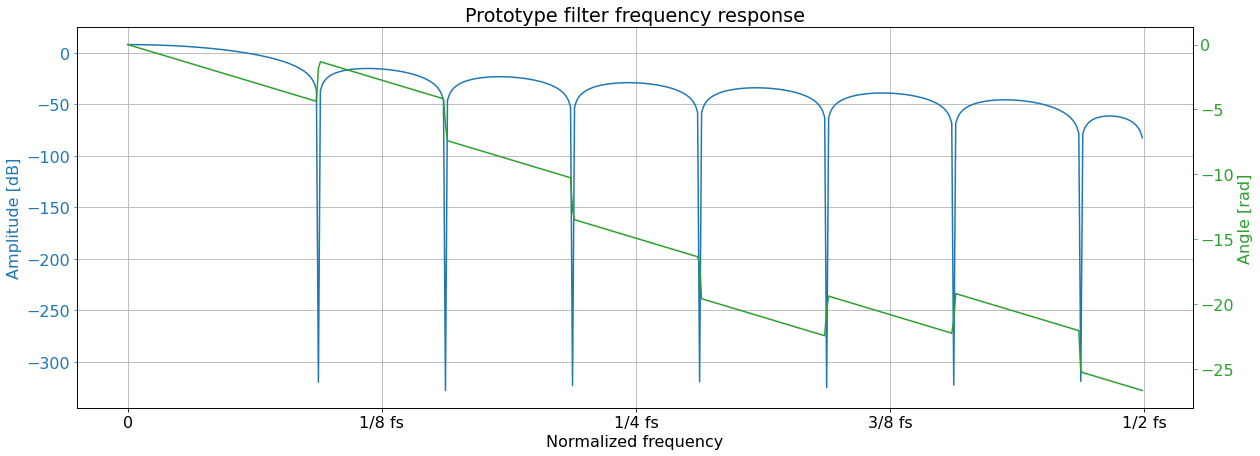

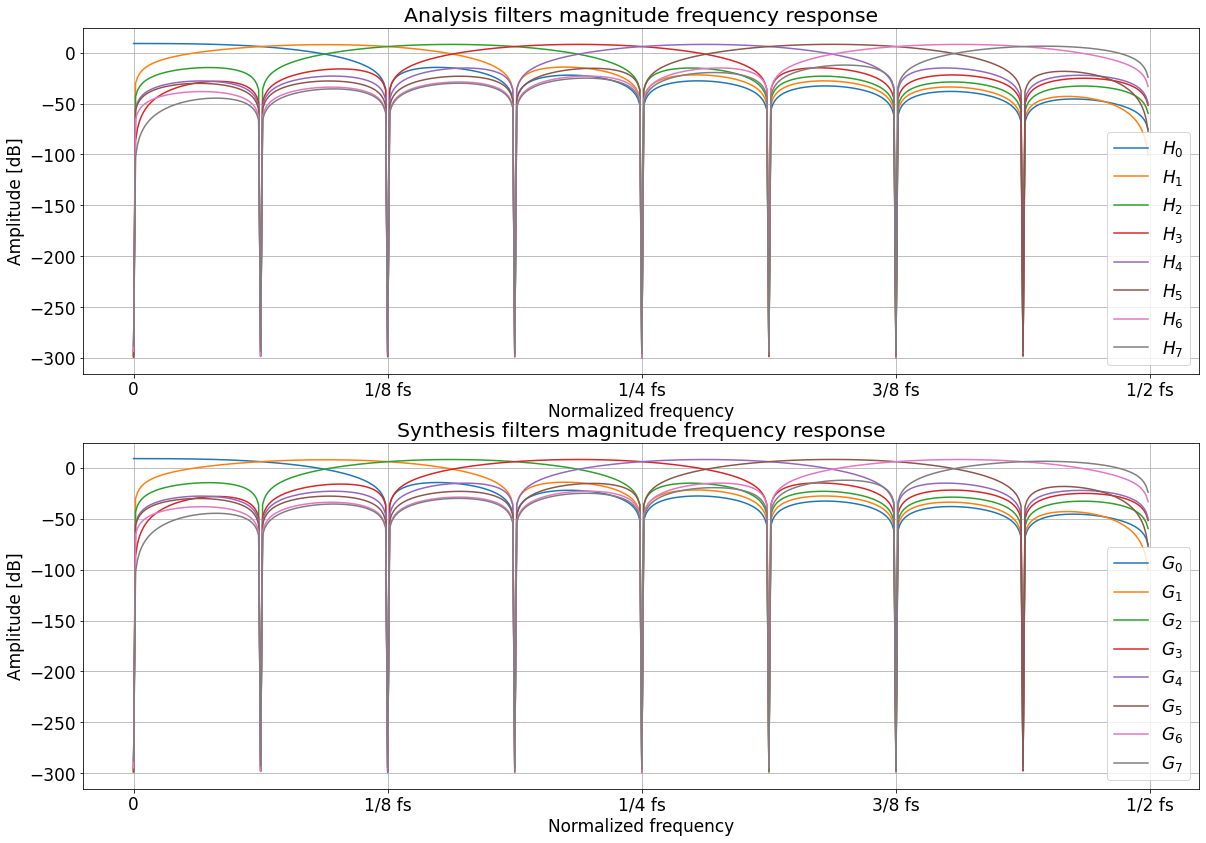

In [5]:
_, P = scipy.signal.freqz(p)
angles = np.unwrap(np.angle(P))


plt.rc('font', size=16)
fig, ax = plt.subplots(figsize=(20, 7))

ax.plot(20*np.log10(abs(P)), '#1f77b4')
ax.grid()
ax.set_title('Prototype filter frequency response')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude [dB]', color='#1f77b4')
ax.tick_params(axis='y', colors='#1f77b4')
ax.set_xticks([0, len(P)/4, len(P)/2, 3*len(P)/4, len(P)])
ax.set_xticklabels(['0', r'1/8 fs', '1/4 fs', '3/8 fs', '1/2 fs'])

ax2 = ax.twinx()
ax2.plot(angles, '#2ca02c')
ax2.set_ylabel('Angle [rad]', color='#2ca02c')
ax2.tick_params(axis='y', colors='#2ca02c')

fig.show()


plt.rc('font', size=17)

fig, ax = plt.subplots(2, 1, figsize=(20, 14))

for k in range(M):
    _, H = scipy.signal.freqz(h[k])
    ax[0].plot(20*np.log10(abs(H)+1e-15), label='$H_{}$'.format(k))
ax[0].grid()
ax[0].set_title('Analysis filters magnitude frequency response')
ax[0].set_xlabel('Normalized frequency')
ax[0].set_ylabel('Amplitude [dB]')

if M < 10:
    ax[0].legend()
ax[0].set_xticks([0, len(H)/4, len(H)/2, 3*len(H)/4, len(H)])
ax[0].set_xticklabels(['0', r'1/8 fs', '1/4 fs', '3/8 fs', '1/2 fs'])

for k in range(M):
    w, G = scipy.signal.freqz(g[k])
    ax[1].plot(20*np.log10(abs(G)+1e-15), label='$G_{}$'.format(k))
ax[1].grid()
ax[1].set_title('Synthesis filters magnitude frequency response')
ax[1].set_xlabel('Normalized frequency')
ax[1].set_ylabel('Amplitude [dB]')

if M < 10:
    ax[1].legend()
ax[1].set_xticks([0, len(G)/4, len(G)/2, 3*len(G)/4, len(G)])
ax[1].set_xticklabels(['0', r'1/8 fs', '1/4 fs', '3/8 fs', '1/2 fs'])
    
plt.show()

# Perfect reconstruction property
Check the perfect reconstruction property of your filterbank from the previous taks. First, complete the `analysis` and `synthesis` functions based on the filterbank diagram. You can use some of your functions from the previous notebook about resampling. Next, generate a <b>suitable</b> test signal and run it through the filterbank - place the original and synthesized signal in variables called  `x` and `y`, respectively.

In [6]:
"Your code goes below here."
def downsample(x, K, t=None):
    """
    This function downsamples a given signal K-times. It also returns new timestamps if they were given. 
    
    Parameters:
        x - Vector to decimate.
        t - Timestamps.
        K - Decimation factor. It should be an integer.
    
    Returns:
        y_K - Decimated signal.
        t_K - New timestamps.
    """
    
    "Your code goes below here."
    i=x.size
    k=np.arange(0,i,K)
    y_K=x[k]
    if t is None:
        return y_K
    else:
        t_last=t[-1]
        t_first=t[0]
        dt=t[1]-t[0]
        t_K=np.arange(t_first,t_last+dt,(K*dt))
        return y_K, t_K
    
def upsample(x, L, t=None):
    """
    This function upsamples a given signal L-times. It also returns new timestamps if they were given.
    
    Parameters:
        x - Vector to expand.
        L - Expansion factor. It should be an integer.
    
    Returns:
        y_L - Expanded signal.
        t_L - New timestamps.
    """
    
    "Your code goes below here."
    i=x.size
    l=np.arange(0,i,(1/L))
    y_L=np.empty(l.size)
    for j in range(l.size):
        if(l[j]%1==0):
            h=int(l[j])
            y_L[j]=x[h]
        else:
            y_L[j]=0
    if t is None:
        return y_L
    else:
        t_last=t[-1]
        t_first=t[0]
        dt=t[1]-t[0]
        t_L=np.arange(t_first,t_last+dt,(dt/L))
        return y_L, t_L
    
def analysis(x, p, M):
    h = analysis_filters(p, M)
    y = np.empty((M,int(x.size/M)))
    for k in range(M):
        z = np.convolve(x,h[k],mode='same')
        y[k] = downsample(z, M)
    return y

def synthesis(y, p, M):
    g = synthesis_filters(p, M)
    x = np.empty((M,y.size))
    for k in range(M):
        j = upsample(y[k], M)
        x[k] = np.convolve(j,g[k],mode='same')
    return np.sum(x,axis=0)

In [29]:
"Your code goes below here."
M = 50
n = np.arange(2*M)

p = 1/((2*M)**(1/2))*np.sin((n+0.5)*np.pi/(2*M))
fs = 500
f1 = 20
f2 = 40
t = np.arange(fs) * 1/fs
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

yx = analysis(x,p,M)
y = synthesis(yx,p,M)


### Verify your implementation
Look at the filterbank output and it's frequency response. Change the filterbank from previous task by setting different number of subbands $M$ and look at the results.

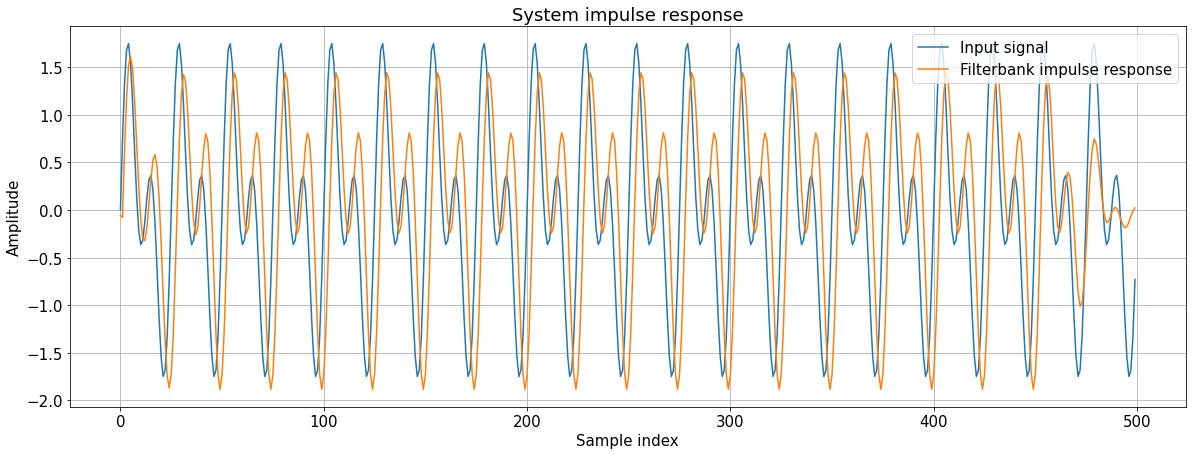

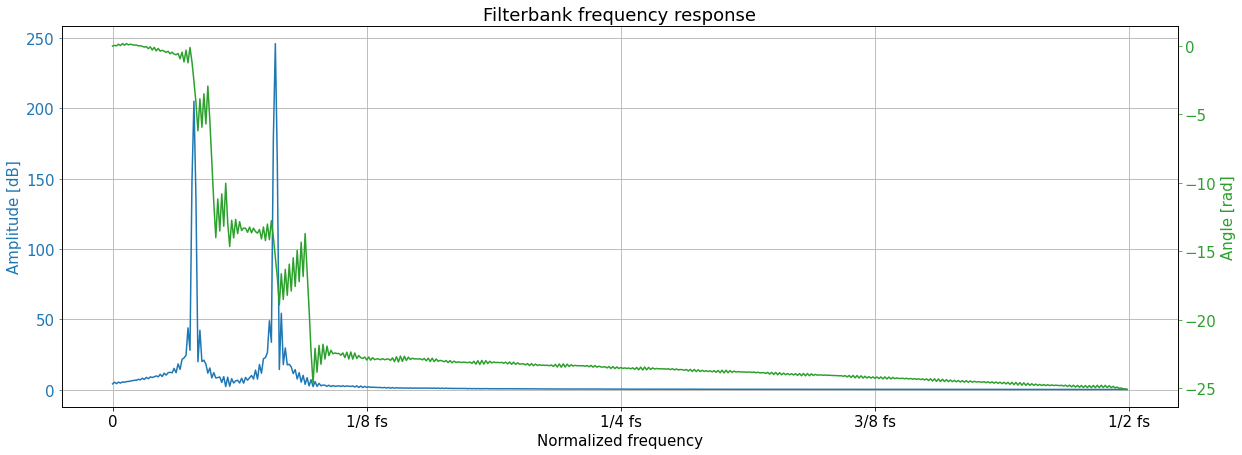

In [30]:
plt.rc('font', size=15)

fig = plt.figure(figsize=(20, 7))

plt.plot(x, label='Input signal')
plt.plot(y, label='Filterbank impulse response')
plt.title('System impulse response')
plt.xlabel('Sample index')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

fig.show()


_, Y = scipy.signal.freqz(y)
angles = np.unwrap(np.angle(Y))

plt.rc('font', size=15)

fig, ax = plt.subplots(figsize=(20, 7))

ax.plot(abs(Y), '#1f77b4')
ax.grid()
ax.set_title('Filterbank frequency response')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude [dB]', color='#1f77b4')
ax.tick_params(axis='y', colors='#1f77b4')
ax.set_xticks([0, len(P)/4, len(P)/2, 3*len(P)/4, len(P)])
ax.set_xticklabels(['0', r'1/8 fs', '1/4 fs', '3/8 fs', '1/2 fs'])

ax2 = ax.twinx()
ax2.plot(angles, '#2ca02c')
ax2.set_ylabel('Angle [rad]', color='#2ca02c')
ax2.tick_params(axis='y', colors='#2ca02c')
ax2.set_xticks([0, len(P)/4, len(P)/2, 3*len(P)/4, len(P)])
ax2.set_xticklabels(['0', r'1/8 fs', '1/4 fs', '3/8 fs', '1/2 fs'])

fig.show()

**Question**: What is the proper test signal? Why?

**Answer**: Sygnał próbkowany z częstotliwością równej wielokrotności M z zachowaniem warunków twierdzenia Shannona.

# Summary
After finishing this notebook you should have basic understanding of the cosine-modulated filterbanks. You should also be able to the perfect reconstruction property of any filterbank.